In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy import constants

$\frac{d^{2}\theta}{dt^{2}} = -\frac{g}{l}sin(\theta)$

In [8]:
def RK_4M(t1, x0, k, l, h):
    """
    ODE Solver for ODEs of the form dx/dt = v, dv/dt = -(k/l)*sin(x)
    using Runge-Kutta 4th order Method.

    Args:
        t1: Time to solve the equation up to
        x0: Initial position at t = 0
        k: Spring constant or equivalent parameter
        l: Length of pendulum or equivalent parameter
        h: Step size of the method

    Returns:
        t: Array of time points
        x: Array of position values at each time point
        v: Array of velocity values at each time point
        E: Array of energy values at each time point
    """
    # Initialize arrays
    t = np.arange(0, t1 + h, h)
    n = len(t)
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)

    # Set initial conditions
    x[0] = x0
    v[0] = v0
    E[0] = 0.5 * k * x[0]**2 + 0.5 * l * v[0]**2

    # Main RK4 loop
    for i in range(1, n):
        # Compute RK4 steps for position
        k1_x = h * v[i-1]
        k2_x = h * (v[i-1] + 0.5 * k1_x)
        k3_x = h * (v[i-1] + 0.5 * k2_x)
        k4_x = h * (v[i-1] + k3_x)

        x[i] = x[i-1] + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        #x[i] = np.fmod(x[i], 2 * np.pi)
      
        # Compute RK4 steps for velocity
        k1_v = h * (-k / l) * np.sin(x[i-1])
        k2_v = h * (-k / l) * np.sin(x[i-1] + 0.5 * k1_x)
        k3_v = h * (-k / l) * np.sin(x[i-1] + 0.5 * k2_x)
        k4_v = h * (-k / l) * np.sin(x[i-1] + k3_x)

        # Update position and velocity
        v[i] = v[i-1] + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
        #x[i] = np.fmod(x[i], 2 * np.pi)
      
        # Compute energy
        E[i] = 0.5 * k * np.sin(x[i])**2 + 0.5 * l * v[i]**2
    x = np.fmod(x+np.pi, 2*np.pi)-np.pi
      
    return t, x, v, E


In [9]:
t,x,v,E=RK_4M(t1=10,x0=0.3*np.pi,k=sp.constants.g,l=0.7,h=.0001)

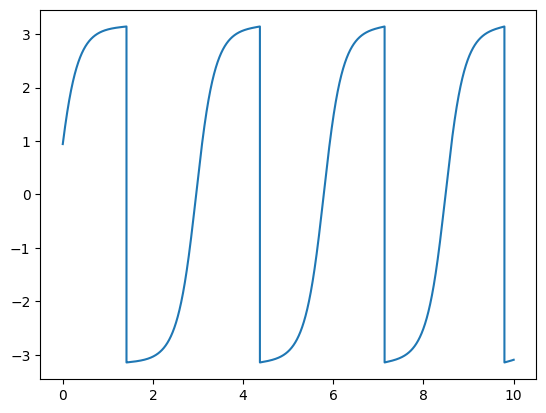

In [10]:
plt.plot(t,x)
plt.show()

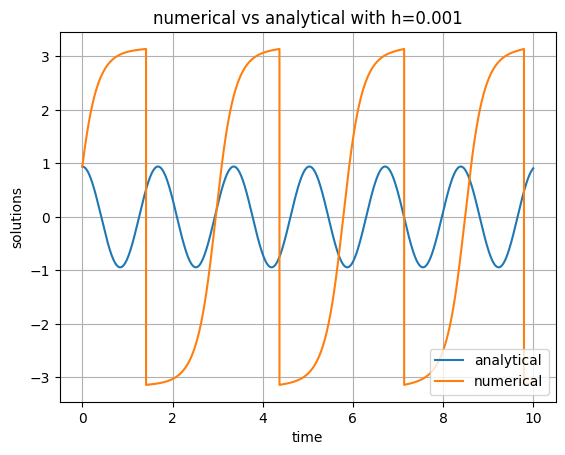

In [11]:
def an1(t):
    return (0.3*np.pi*np.cos(np.sqrt(sp.constants.g/0.7)*t))
plt.plot(t,an1(t),label='analytical')
plt.plot(t,x,label='numerical')
plt.legend()
plt.grid(True)
plt.xlabel("time")
plt.ylabel("solutions")
plt.title("numerical vs analytical with h=0.001")
plt.show()

In [121]:
x[-1]

2.924892725619742

In [7]:
v0=np.sqrt(2 * sp.constants.g * 0.7*(1+np.cos(0.3*np.pi)))/0.7
v0

np.float64(6.669944151489036)

In [470]:
def RK_4M_smallx(t1, x0,k,l, h):
    """ODE Solver for ODEs of the form dx/dt = (k/l)*x using Runge-Kutta 4th order Method. 
    Assumes that the initial condition is given at t = 0 
       
    Args: 
        t1: time to solve the equation up to
        x0: starting value of x, at t = 0
        k:  value of k in the ODE equation
        l: length of pendulum
        h:  step size of the method 
        
    Returns:
        t: An array in increments of h for the dimension of time up to t1
        x: An array for the position coordinate at each timepoint
    """
    
    #Initialise the arrays to be used
    # t is an array containing each of the timepoints that we will step forward to
    t = np.arange(0,t1+h,h)
    # n is the number of timesteps in t
    n = np.shape(t)[0]
    # x starts as an empty array, but we will fill in the values we calculate in the loop, below
    x = np.zeros(n) 
    v = np.zeros(n)
    E = np.zeros(n)
    
    #Set the initial value of x (i.e. x[0])
    x[0] = x0
    v[0]= 0
    E[0]=  0.5 * k * x[0]**2 + 0.5 * l * v[0]**2
    
    #Loop over the time values and calculate the derivative
    for i in range(1,n): 

        #position
        #k1 value
        k1=h*v[i-1]
        #x midpoint
        x_m = (v[i-1] + (1/2)*k1)
        #k2 value
        k2=h*(x_m)
        #k3 value
        k3=(h*v[i-1] + (h/2)*k2) 
        #k4 value
        k4=(h*v[i-1] + (h)*k3)
        
        #x value
        x[i] = x[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4

        #velocity
        #k1 value
        k1=h*(-k/l)*x[i-1]
        #k2 value
        k2=h*((-k/l)*x[i-1] + (1/2)*k1)
        #k3 value
        k3=(h*(-k/l)*x[i-1] + (h/2)*k2) 
        #k4 value
        k4=(h*(-k/l)*x[i-1] + (h)*k3)
        
        #v value
        v[i] = v[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4 

         # Calculate energy at this step
        E[i] = 0.5 * k * x[i-1]**2 + 0.5 * l * v[i-1]**2
    
    
    return(t,x,v,E) 

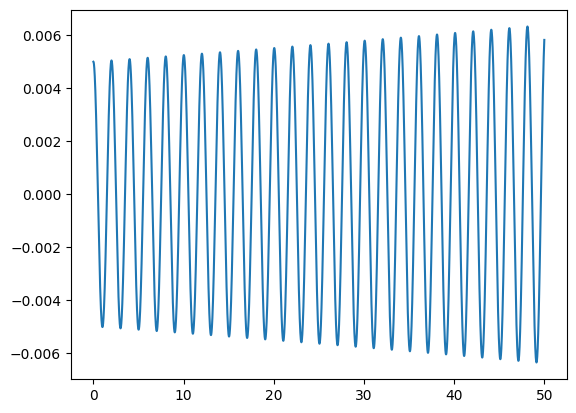

In [468]:
t,x,v,E=RK_4M_smallx(t1=50,x0=0.005,k=sp.constants.g,l=1,h=.001)
plt.plot(t,x)
plt.show()

In [622]:
def rk4(y, t, dt, derivs):
    k1 = dt * derivs(t, y)
    k2 = dt * derivs(t + dt / 2, y + k1 / 2)
    k3 = dt * derivs(t + dt / 2, y + k2 / 2)
    k4 = dt * derivs(t + dt, y + k3)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y_next

ValueError: x and y must have same first dimension, but have shapes (2002,) and (100001,)

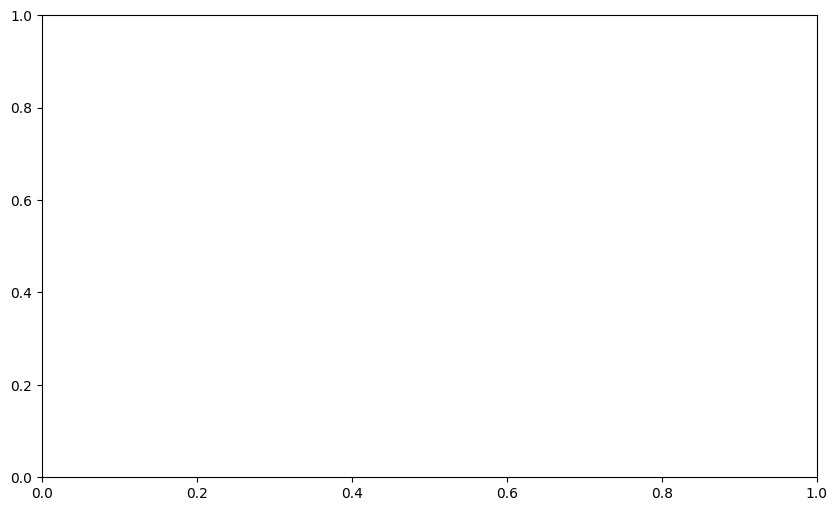

In [45]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy import constants


def RK4_double_pendulum(t1, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0, L1, L2, m1, m2, g, h):
    """
    ODE Solver for the double pendulum using Runge-Kutta 4th order Method.

    Args:
        t1: Time to solve the equation up to
        theta1_0: Initial angle of the first pendulum
        theta2_0: Initial angle of the second pendulum
        theta1_dot_0: Initial angular velocity of the first pendulum
        theta2_dot_0: Initial angular velocity of the second pendulum
        L1, L2: Lengths of the pendulum arms
        m1, m2: Masses of the pendulum bobs
        g: Gravitational acceleration
        h: Step size of the method

    Returns:
        t: Array of time points
        theta1: Array of angle values for the first pendulum
        theta2: Array of angle values for the second pendulum
        theta1_dot: Array of angular velocity values for the first pendulum
        theta2_dot: Array of angular velocity values for the second pendulum
    """
    def derivatives(y):
        """
        Compute the derivatives for the double pendulum.
        Args:
            y: State vector [theta1, theta2, theta1_dot, theta2_dot]

        Returns:
            dydt: Derivatives [theta1_dot, theta2_dot, theta1_ddot, theta2_ddot]
        """
        theta1, theta2, theta1_dot, theta2_dot = y

        delta = theta2 - theta1
        denom1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * delta))
        denom2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * delta))

        theta1_ddot = (
            -g * (2 * m1 + m2) * np.sin(theta1)
            - m2 * g * np.sin(theta1 - 2 * theta2)
            - 2 * np.sin(delta) * m2 * (theta2_dot**2 * L2 + theta1_dot**2 * L1 * np.cos(delta))
        ) / denom1

        theta2_ddot = (
            2 * np.sin(delta)
            * (
                theta1_dot**2 * L1 * (m1 + m2)
                + g * (m1 + m2) * np.cos(theta1)
                + theta2_dot**2 * L2 * m2 * np.cos(delta)
            )
        ) / denom2

        return np.array([theta1_dot, theta2_dot, theta1_ddot, theta2_ddot])

    # Initialize arrays
    t = np.arange(0, t1 + h, h)
    n = len(t)
    theta1 = np.zeros(n)
    theta2 = np.zeros(n)
    theta1_dot = np.zeros(n)
    theta2_dot = np.zeros(n)

    # Set initial conditions
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1_dot[0] = theta1_dot_0
    theta2_dot[0] = theta2_dot_0

    # Main RK4 loop
    for i in range(1, n):
        y = np.array([theta1[i - 1], theta2[i - 1], theta1_dot[i - 1], theta2_dot[i - 1]])

        k1 = h * derivatives(y)
        k2 = h * derivatives(y + 0.5 * k1)
        k3 = h * derivatives(y + 0.5 * k2)
        k4 = h * derivatives(y + k3)

        y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        theta1[i], theta2[i], theta1_dot[i], theta2_dot[i] = y_next

    theta1 = np.fmod(x+np.pi, 2*np.pi)-np.pi
    theta2 = np.fmod(x+np.pi, 2*np.pi)-np.pi
    # theta1_dot = np.fmod(x+np.pi, 2*np.pi)-np.pi
    # theta2_dot = np.fmod(x+np.pi, 2*np.pi)-np.pi
    
    return t, theta1, theta2, theta1_dot, theta2_dot

# Parameters
L1, L2 = 1.0, 1.0  # Lengths of the pendulums
m1, m2 = 1.0, 1.0  # Masses of the pendulum bobs
g =sp.constants.g         # Gravitational acceleration
theta1_0, theta2_0 = np.pi / 4, np.pi / 6  # Initial angles
theta1_dot_0, theta2_dot_0 = 0, 0         # Initial angular velocities
t1 = 20.0          # Simulation time
h = 0.01           # Time step

# Simulate
t, theta1, theta2, theta1_dot, theta2_dot = RK4_double_pendulum(
    t1, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0, L1, L2, m1, m2, g, h
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, theta1, label=r'$\theta_1$')
plt.plot(t, theta2, label=r'$\theta_2$')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Double Pendulum Simulation with RK4')
plt.grid()
plt.show()


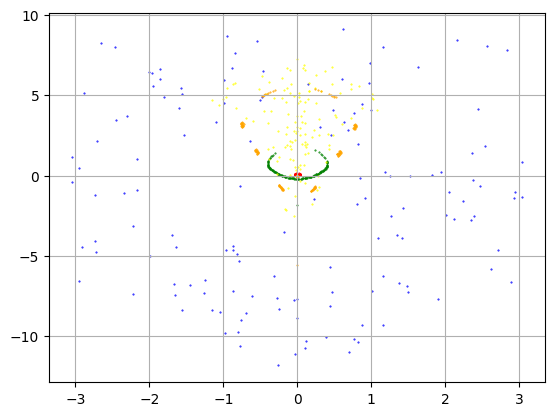

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy import constants


def RK4_double_pendulum(t1, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0, L1, L2, m1, m2, g, h):
    """
    ODE Solver for the double pendulum using Runge-Kutta 4th order Method.

    Args:
        t1: Time to solve the equation up to
        theta1_0: Initial angle of the first pendulum
        theta2_0: Initial angle of the second pendulum
        theta1_dot_0: Initial angular velocity of the first pendulum
        theta2_dot_0: Initial angular velocity of the second pendulum
        L1, L2: Lengths of the pendulum arms
        m1, m2: Masses of the pendulum bobs
        g: Gravitational acceleration
        h: Step size of the method

    Returns:
        t: Array of time points
        theta1: Array of angle values for the first pendulum
        theta2: Array of angle values for the second pendulum
        theta1_dot: Array of angular velocity values for the first pendulum
        theta2_dot: Array of angular velocity values for the second pendulum

    """
    def compute_energy(theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
        """Computes total energy."""
        # Kinetic energy
        T = 0.5 * m1 * l1**2 * omega1**2 + 0.5 * m2 * (
            l1**2 * omega1**2
            + l2**2 * omega2**2
            + 2 * l1 * l2 * omega1 * omega2 * np.cos(theta1 - theta2)
        )
        # Potential energy
        V = -(m1 + m2) * g * l1 * np.cos(theta1) - m2 * g * l2 * np.cos(theta2)

        return T + V
    
    def update_ang(theta1, theta2, theta1_dot, m1, m2, L1, L2, g):
        '''updates angle to keep E const'''
        const1=0.5*(m1+m2)*L1**2 * theta1_dot**2 - (m1+m2)*g*L1*np.cos(theta1) - m2*g*L2*np.cos(theta2)
        const2=m2*theta1_dot*L1*L2*np.cos(theta1-theta2)
        const3=0.5*m2*L2**2
        #theta2_dot
        if const2==0:
            theta2_dot=np.sqrt(-const1/const3)
        else:
            theta2_dot=(const2/(2*const3)) * (np.sqrt(1-(4*const3*const1*const2**-2))-1)

        return theta2_dot

    def normalize_theta(theta):
        return np.mod(theta + np.pi, 2 * np.pi) - np.pi

    def derivatives(y):
        """
        Compute the derivatives for the double pendulum.
        Args:
            y: State vector [theta1, theta2, theta1_dot, theta2_dot]

        Returns:
            dydt: Derivatives [theta1_dot, theta2_dot, theta1_ddot, theta2_ddot]
        """
        theta1, theta2, theta1_dot, theta2_dot = y

        mass_diff=m2/(m1+m2)
        delta = theta1 - theta2
        denom1 = (1-((np.cos(delta)*np.cos(delta)) * mass_diff))
        denom2 = (1-((np.cos(delta)*np.cos(delta)) * mass_diff))

        theta1_ddot = (
            g/L1 *( (mass_diff * np.sin(theta2) * np.cos(delta) ) - np.sin(theta1) )
            - (np.sin(delta) * mass_diff * (theta2_dot*theta2_dot * (L2/L1) + theta1_dot*theta1_dot * np.cos(delta)))
        ) / denom1

        theta2_ddot = (
                g/L2 *( (mass_diff * np.sin(theta1) * np.cos(delta)) - np.sin(theta2) )
            + np.sin(delta) * (theta1_dot*theta1_dot * (L1/L2) + theta2_dot*theta2_dot * mass_diff * np.cos(delta))
       
            ) / denom2

        return np.array([theta1_dot, theta2_dot, theta1_ddot, theta2_ddot])
    


    # Initialize arrays
    t = np.arange(0,t1+h,h)
    n = np.shape(t)[0]
    theta1 = np.zeros(n)
    theta2 = np.zeros(n)
    theta1_dot = np.zeros(n)
    theta2_dot = np.zeros(n)
    energy = np.zeros(n)
    q = np.zeros(n)
    p = np.zeros(n)

    # Set initial conditions
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1_dot[0] = theta1_dot_0
    theta2_dot[0] = theta2_dot_0
    q[0]= theta2_0
    p[0]=theta2_dot_0
    # Main RK4 loop
    for i in range(1, n):
        y = np.array([theta1[i - 1], theta2[i - 1], theta1_dot[i - 1], theta2_dot[i - 1]])

        k1 = h * derivatives(y)
        k2 = h * derivatives(y + 0.5 * k1)
        k3 = h * derivatives(y + 0.5 * k2)
        k4 = h * derivatives(y + k3)

        y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        theta1[i], theta2[i], theta1_dot[i], theta2_dot[i] = y_next

        energy[i] = compute_energy(
            normalize_theta(theta1[i-1]),
            normalize_theta(theta2[i-1]),
            theta1_dot[i-1],
            theta2_dot[i-1],
            m1,
            m2,
            L1,
            L2,
            g
        )


        theta1[i] = np.mod(theta1[i]+np.pi, 2*np.pi)-np.pi
        theta2[i] = np.mod(theta2[i]+np.pi, 2*np.pi)-np.pi

        if theta1[i]>=0 and theta1[i-1]<0 and theta1_dot[i]>0:
            q[i]=theta2[i]
            p[i]=theta2_dot[i]
            
        if E[-1]!=E0:

        theta2_dot_0=update_ang(theta1[-1],theta2_0, theta1_dot[-1], m1, m2, L1, L2, g)

    else:
        continue
    
    return t, theta1, theta2, theta1_dot, theta2_dot,energy,q,p

# Parameters
L1, L2 = 1.0, 1.0  # Lengths of the pendulums
m1, m2 = 1.0, 0.5  # Masses of the pendulum bobs
g =sp.constants.g         # Gravitational acceleration
theta1_0, theta2_0 = 0.001, 0.00005*np.pi  # Initial angles
theta1_dot_0, theta2_dot_0 = 0.0, 0.05*np.pi         # Initial angular velocities
t1 = 300.0          # Simulation time
h = 0.01           # Time step
E0=0.1              #Energy
q0=[]
p0=[]

# Simulate
for i in range(5):


    # def update_ang(theta1, theta2, theta1_dot, m1, m2, L1, L2, g):
    #     '''updates angle to keep E const'''
    #     const1=0.5*(m1+m2)*L1**2 * theta1_dot**2 - (m1+m2)*g*L1*np.cos(theta1) - m2*g*L2*np.cos(theta2)
    #     const2=m2*theta1_dot*L1*L2*np.cos(theta1-theta2)
    #     const3=0.5*m2*L2**2
    #     #theta2_dot
    #     if const2==0:
    #         theta2_dot=np.sqrt(-const1/const3)
    #     else:
    #         theta2_dot=(const2/(2.0*const3)) * (np.sqrt(1-(4*const3*const1*const2**-2))-1)

    #     return theta2_dot
    
    #theta2_dot_0=update_ang(theta1,theta2, theta1_dot, m1, m2, L1, L2, g)

    t, theta1, theta2, theta1_dot, theta2_dot,E,q,p = RK4_double_pendulum(
    t1, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0, L1, L2, m1, m2, g, h
    )
    #print(np.size(q))
    q0.append(q)
    #print(np.size(p))
    p0.append(p)
   
    if E[-1]!=E0:

        theta2_dot_0=update_ang(theta1[-1],theta2_0, theta1_dot[-1], m1, m2, L1, L2, g)

    else:
        continue
        

    
    # plt.xlim(-np.pi,np.pi)
    # plt.ylim(-np.pi,np.pi)
    

    i=+1

    # Plot results
    # plt.figure(figsize=(10, 6))
    # plt.plot(t, theta1, label=r'$\theta_1$')
    # plt.plot(t, theta2, label=r'$\theta_2$')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Angle (rad)')
    # plt.legend()
    # plt.title('Double Pendulum Simulation with RK4')
    # plt.grid()
    # plt.show()
plt.scatter(q0[0],p0[0],color='red',s=0.85,marker='.')
plt.scatter(q0[1],p0[1],color='blue',s=0.85,marker='.')
plt.scatter(q0[2],p0[2],color='green',s=0.85,marker='.')
plt.scatter(q0[3],p0[3],color='yellow',s=0.85,marker='.')
plt.scatter(q0[4],p0[4],color='orange',s=0.85,marker='.')
plt.grid(True)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


Double Pendulum animated


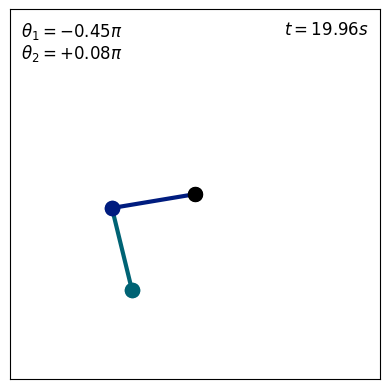

In [102]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


    # theta should always be within [-pi, +pi]
theta1   = (theta1 + np.pi) % (2*np.pi) - np.pi
theta2   = (theta2 + np.pi) % (2*np.pi) - np.pi

    # Setup the the plot
fig, ax = plt.subplots()
ax.set_xlim(-1.1 * (L2+L1), 1.1 * (L2+L1) )
ax.set_ylim(-1.1 * (L2+L1), 1.1 * (L2+L1) )
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])

# plt.rc ('text',   usetex    = True)
# plt.rc ('font',   family    = "computer modern")    

    # assigns each mass within [0,+inf] a bulksize within [min_size,max_size]
def bulk_size( min_size, max_size, mass):
    return min_size + (max_size-min_size)*(1 - np.exp(-mass/100))
min_size = 10
max_size = 25

    # Initialise dynamic objects to be drawn
bulk0,          = ax.plot([0,0], [0,0], 'o', markersize=10, color="black")
line1,          = ax.plot([], [],       '-', lw=3, color=sns.color_palette("dark")[0])
bulk1,          = ax.plot([], [],       'o', markersize=bulk_size(min_size, max_size, m1), color=sns.color_palette("dark")[0])
line2,          = ax.plot([], [],       '-', lw=3, color=sns.color_palette("dark")[9])
bulk2,          = ax.plot([], [],       'o', markersize=bulk_size(min_size, max_size, m2), color=sns.color_palette("dark")[9])
time_label      = ax.text(0.97, 0.97, " ", transform=ax.transAxes, fontsize=12, ha='right', va="top")
theta1_label    = ax.text(0.03, 0.97, " ", transform=ax.transAxes, fontsize=12, ha='left', va="top")
theta2_label    = ax.text(0.03, 0.91, " ", transform=ax.transAxes, fontsize=12, ha='left', va="top")

    # ensure the lines are in the background
line1.set_zorder(0)
line2.set_zorder(0)

    # Controls the length and framerate of the animation
def framerate_control( t1, h, t_max, framerate_max):

    step = 1
    while(1/(h*step) > framerate_max):
        step = step + 1
    frame_count = int( min(t1, t_max)/(h*step) ) 
    return frame_count, step

    # the animation last at most "t_max" seconds with at most "framerate_max" frames per second
t_max           = 20.0
framerate_max   = 25
frame_count, step = framerate_control(t1, h, t_max, framerate_max)


    # update function for all dynamic objects
def update(frame):
    
        # First pendulum's position
    x1 = L1 * np.sin(theta1[frame])
    y1 = -L1 * np.cos(theta1[frame])
    line1.set_data([0, x1], [0, y1]) 
    bulk1.set_data([x1,x1],[y1,y1])
        # Second pendulum's position
    x2 = x1 + L2 * np.sin(theta2[frame])
    y2 = y1 - L2 * np.cos(theta2[frame])
    line2.set_data([x1, x2], [y1, y2]) 
    bulk2.set_data([x2,x2],[y2,y2])
    
        # dynamic labels
    time_label.set_text(f"$t = {t[frame]:.2f} s $")
    theta1_label.set_text(f"$\\theta_1 = {theta1[frame]/np.pi:+.2f}\\pi $")
    theta2_label.set_text(f"$\\theta_2 = {theta2[frame]/np.pi:+.2f}\\pi $")

    return line1, bulk1, line2, bulk2, theta1_label, theta2_label, time_label 

    # Create the animation
ani = FuncAnimation(fig, update, frames=range(0, frame_count*step, step), interval= h * step * 1000, blit=True)
ani.save( "./Gif.gif")

print("Double Pendulum animated")

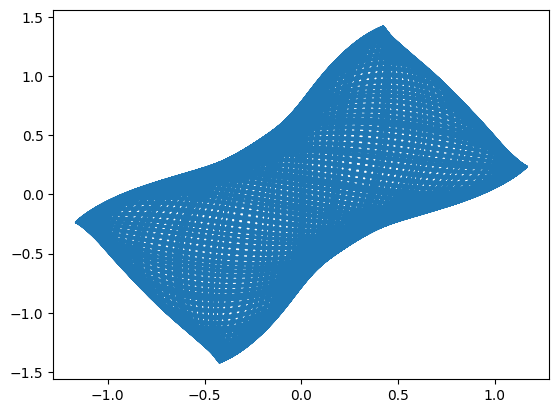

In [137]:
plt.plot(theta1,theta2)

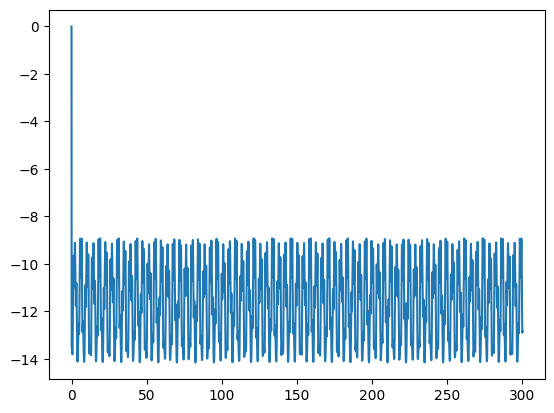

In [138]:
plt.plot(t,E)
plt.show()

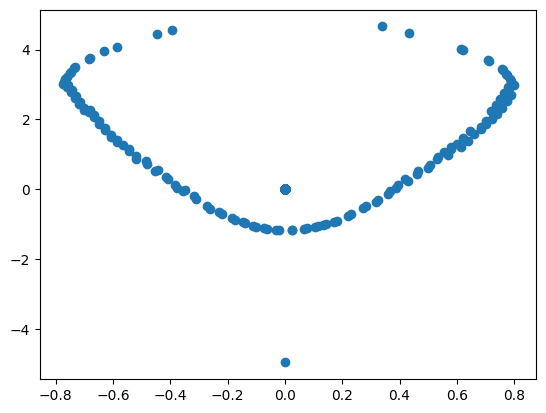

In [139]:
plt.scatter(q,p)
# plt.xlim(-np.pi,np.pi)
# plt.ylim(-np.pi,np.pi)
plt.show()